<a href="https://colab.research.google.com/github/Ayush-mishra-0-0/Time-Series_Analysis/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>Time Series Analysis</h1>
</center>

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams["axes.grid"] = True
plt.rcParams["font.size"] = 14

In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/deba-iitbh/datasets/main/AirPassengers.csv')
dataset['Month'] = pd.to_datetime(dataset['Month'])
indexedDataset = dataset.set_index('Month')

## Exploring the Dataset

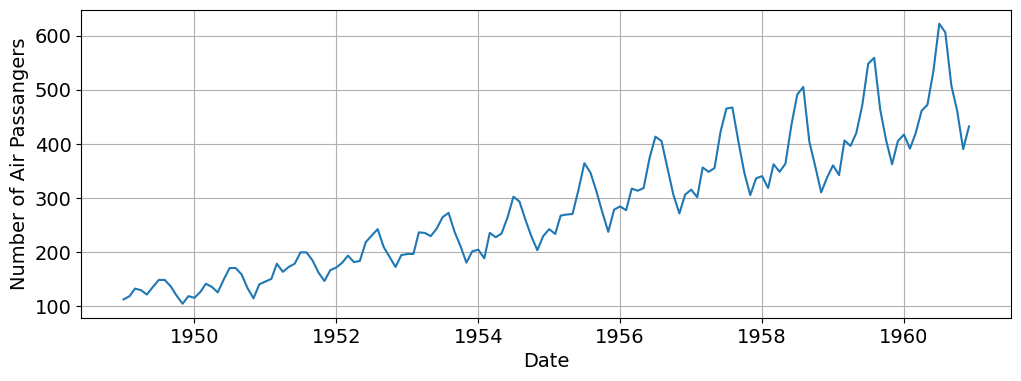

In [6]:
## plot graph
plt.xlabel("Date")
plt.ylabel("Number of Air Passangers")
plt.plot(indexedDataset)

In [7]:
# Determining the rolling stattistics
rollmean = indexedDataset.rolling(window = 12).mean()
rollstd = indexedDataset.rolling(window = 12).std()
print(rollmean, rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


In [8]:
indexedDataset.head(20)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


## Checking Stationarity with rolling mean and standard Deviation

In [9]:
rollmean.head(20)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


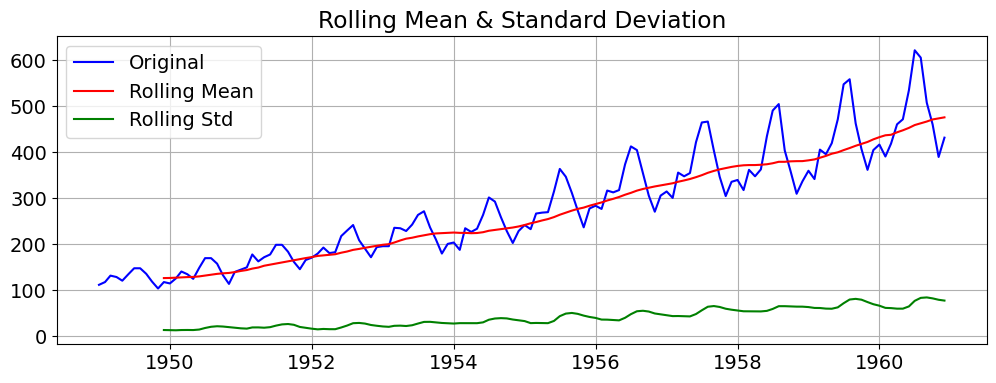

In [10]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color ='blue', label = 'Original')
mean = plt.plot(rollmean, color ='red', label = 'Rolling Mean')
std = plt.plot(rollstd, color ='green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

## Checking Stationarity with Augmented Dickey Fuller Statistical Test

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller Test
print("Results of Diceky-Fuller Test:")
dftest = adfuller(indexedDataset['#Passengers'], autolag = 'AIC')
dfoutput = pd.Series(dftest[:4], index= ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])

for key, value in dftest[4].items():
  dfoutput[f'Critical Value ({key})'] = value

print(dfoutput)

Results of Diceky-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Wrapping Visual and Statistical tools in a single function

In [12]:
def test_stationarity(timeseries):
  # Determining the rolling stattistics
  movingAverage = timeseries.rolling(window = 12).mean()
  movingSTD = timeseries.rolling(window = 12).std()

  # Plot rolling statistics
  orig = plt.plot(timeseries, color ='blue', label = 'Original')
  mean = plt.plot(movingAverage, color ='red', label = 'Rolling Mean')
  std = plt.plot(movingSTD, color ='green', label = 'Rolling Std')
  plt.legend(loc = 'best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block = False)

  # Perform Dickey-Fuller Test
  print("Results of Diceky-Fuller Test:")
  dftest = adfuller(timeseries['#Passengers'], autolag = 'AIC')
  dfoutput = pd.Series(dftest[:4], index= ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])

  for key, value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value

  print(dfoutput)

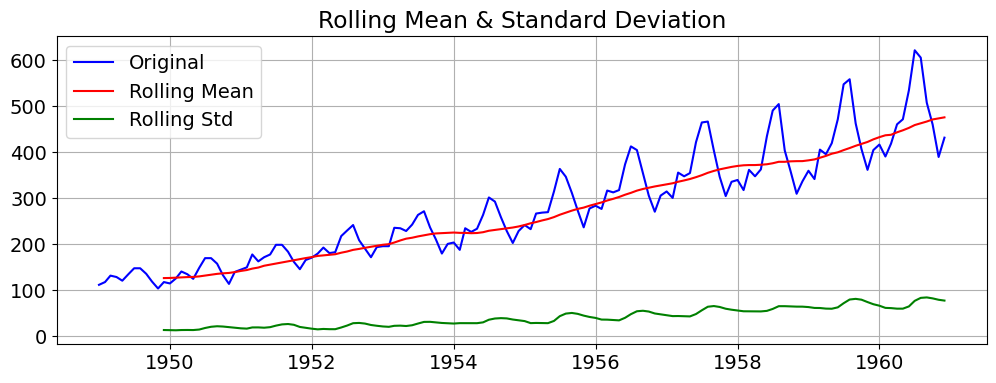

Results of Diceky-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
test_stationarity(indexedDataset)

## Converting Non-Stationary data to Stationary dataset
- Log
- Subtracting Simple rolling Average
- Subtracting Exponential rolling Average
- Subtracting previous value(Most Popular) with shift()
- Seasonal decomposition
- Combination of the above

### 1. Log

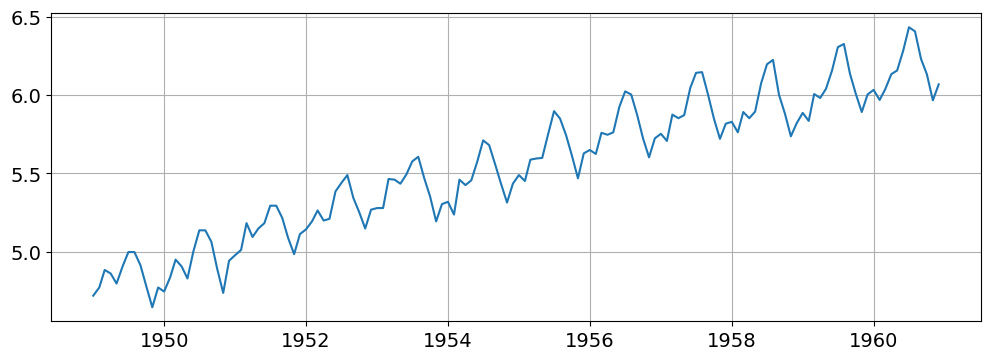

In [14]:
#Estimating trend
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)
plt.show()

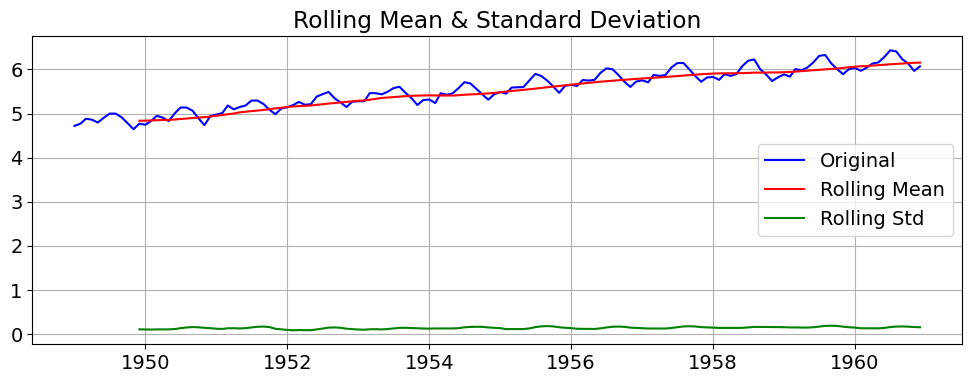

Results of Diceky-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [15]:
test_stationarity(indexedDataset_logscale)

### 2. Differencing Simple Moving Average

In [16]:
movingAverage = indexedDataset_logscale.rolling(window = 12).mean()
datasetLogScalMinusMovingAverage = indexedDataset_logscale - movingAverage
display(datasetLogScalMinusMovingAverage.head(12))

# Remove nan values
datasetLogScalMinusMovingAverage.dropna(inplace= True)
datasetLogScalMinusMovingAverage.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


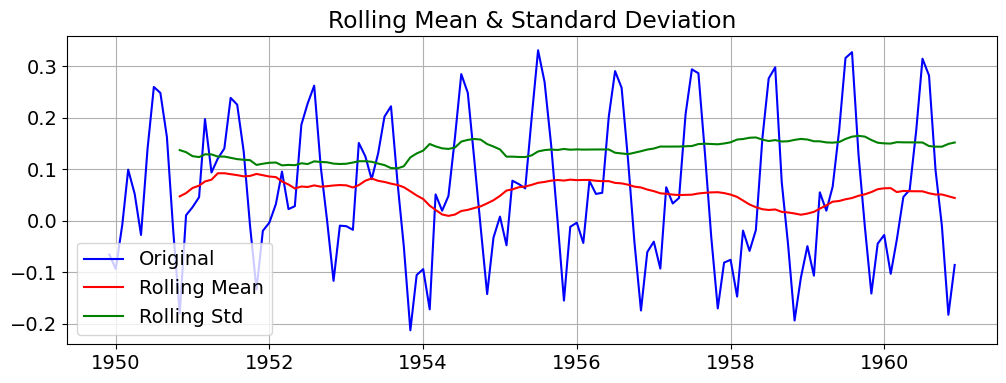

Results of Diceky-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [17]:
test_stationarity(datasetLogScalMinusMovingAverage)

### 3. Differencing Exponential Moving Average

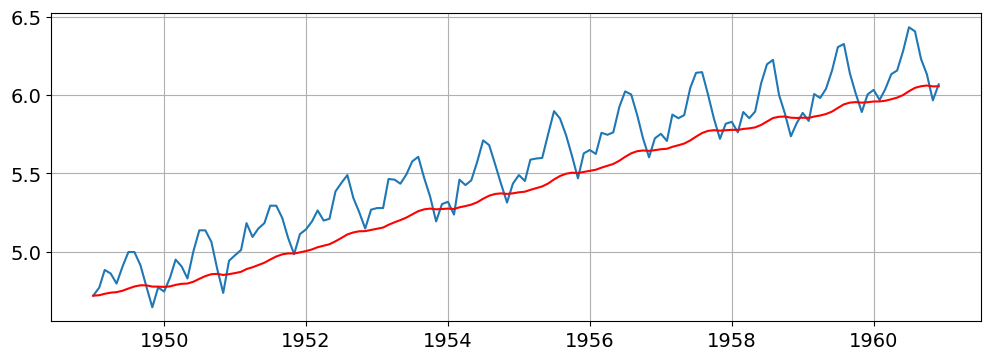

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife = 12, min_periods = 0, adjust = 0).mean()
plt.plot(indexedDataset_logscale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')
plt.show()

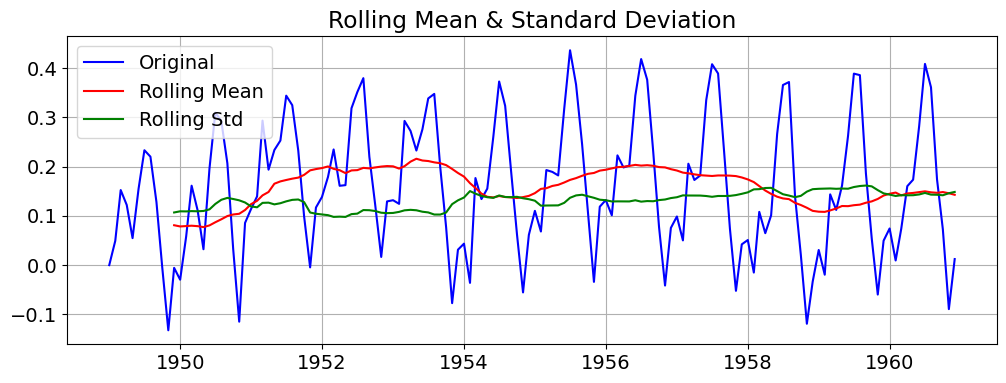

Results of Diceky-Fuller Test:
Test Statistic                  -2.891928
p-value                          0.046295
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [19]:
datasetLogScaleMovingExponentialDecayAverage = indexedDataset_logscale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMovingExponentialDecayAverage)

### 4. Differencing Previous Value

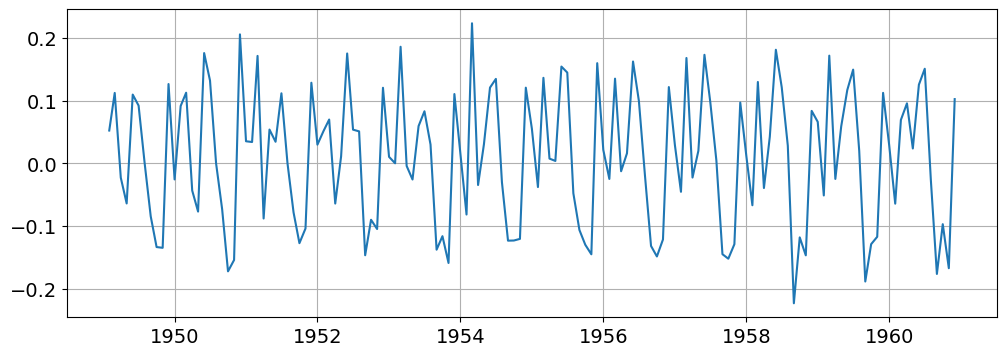

In [20]:
datasetLogDiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogDiffShifting)
plt.show()

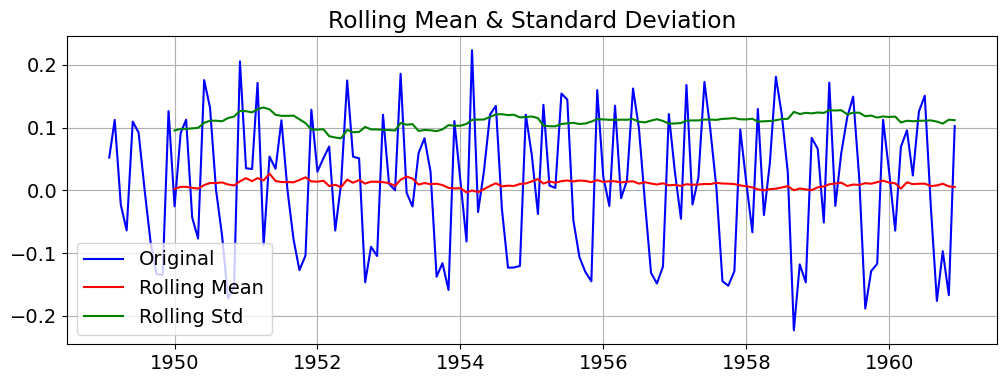

Results of Diceky-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [21]:
datasetLogDiffShifting.dropna(inplace = True)
test_stationarity(datasetLogDiffShifting)

### 5. Seasonal Decomposition

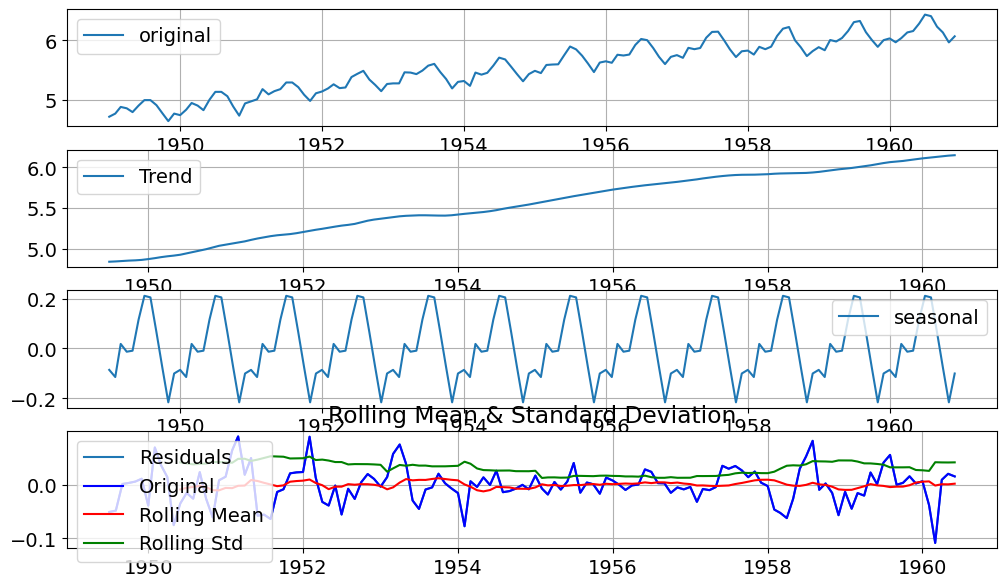

Results of Diceky-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (12, 7))
plt.subplot(411)
plt.plot(indexedDataset_logscale, label = "original")
plt.legend()

plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend()


plt.subplot(413)
plt.plot(seasonal, label = "seasonal")
plt.legend()


plt.subplot(414)
plt.plot(residual, label = "Residuals")
plt.legend()


decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData.to_frame(name = "#Passengers"))

In [23]:
type(decomposedLogData)

pandas.core.series.Series

## ARMA modelling

### Auto Regressive Model

AR(1)
$$
P(today) = Mean + Coeff * P(yesterdat) + noise
$$
$$
P(t) = \mu + \gamma_1 * P(t-1) + \epsilon
$$
- If gamma_1 = 0 model is Mean plus noise

AR(2)
$$
P(t) = \mu + \gamma_1 * P(t-1) + \gamma_2 * P(t-2) \epsilon
$$

### Moving Average MA Model
MA(1) Model
$$
P(t) = \mu + \theta1 * \epsilon(t-1) + \epsilon(t)
$$

## ARMA Model
ARMA(1,1)
$$
P(t) = \mu + \gamma_1 * P(t-1) + \theta_1 * \epsilon(t-1) + \epsilon(t)
$$

ARMA(1,2)
$$
P(t) = \mu + \gamma_1 * P(t-1) + \theta_1 * \epsilon(t-1) + \theta_2 * \epsilon(t-2) + \epsilon(t)
$$

ARMA(2,1)
$$
P(t) = \mu + \gamma_1 * P(t-1) + \gamma_1 * P(t-2) + \theta_1 * \epsilon(t-1) + \epsilon(t)
$$

ARMA(2,2)
$$
P(t) = \mu + \gamma_1 * P(t-1) + \gamma_1 * P(t-2) + \theta_1 * \epsilon(t-1) + \theta_2 * \epsilon(t-2) + \epsilon(t)
$$

## Finding Lags of AR and MA models

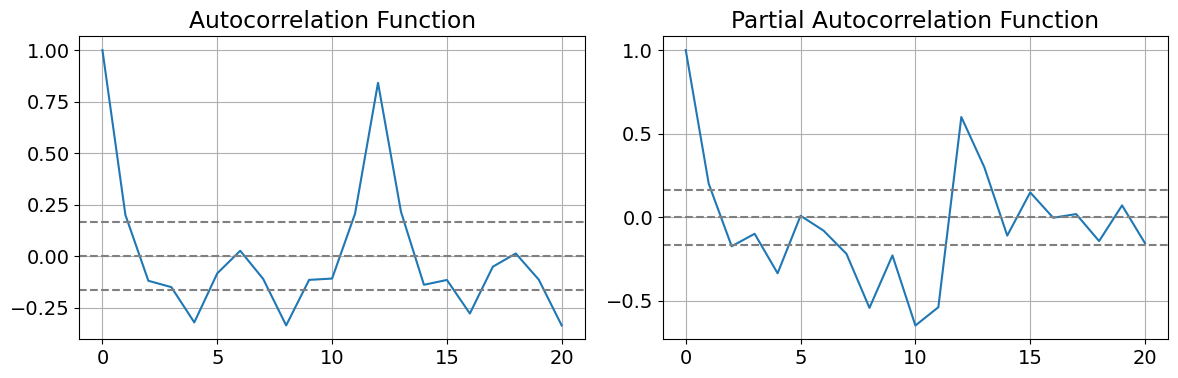

In [24]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--",color="gray")
plt.axhline (y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--", color= "gray")
plt.title("Autocorrelation Function")

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color="gray")
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--",color='gray')
plt.axhline (y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle="--",color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

In [25]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(datasetLogDiffShifting)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

{'bic':             0           1           2
 0 -225.639205 -228.618780 -228.527574
 1 -226.497365 -229.756335 -250.370025
 2 -225.753249 -255.335848 -245.453820
 3 -222.137559 -252.192846 -249.072536
 4 -232.957921 -228.013485 -251.556571,
 'bic_min_order': (2, 1)}

## AR Model

Plotting AR model


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


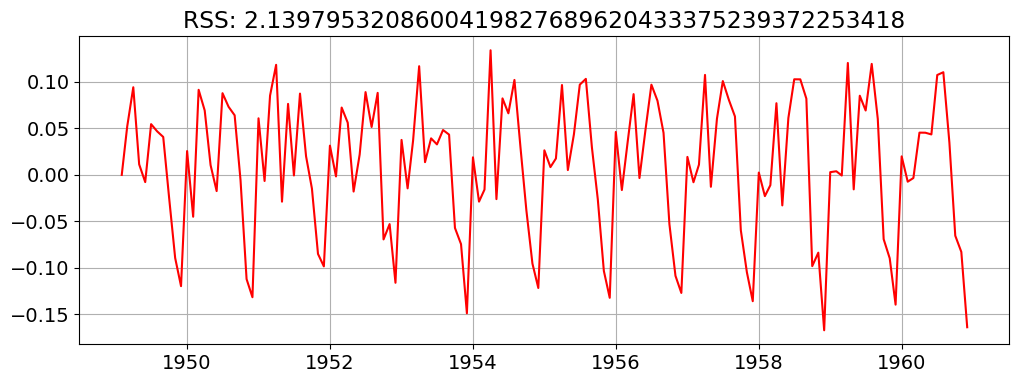

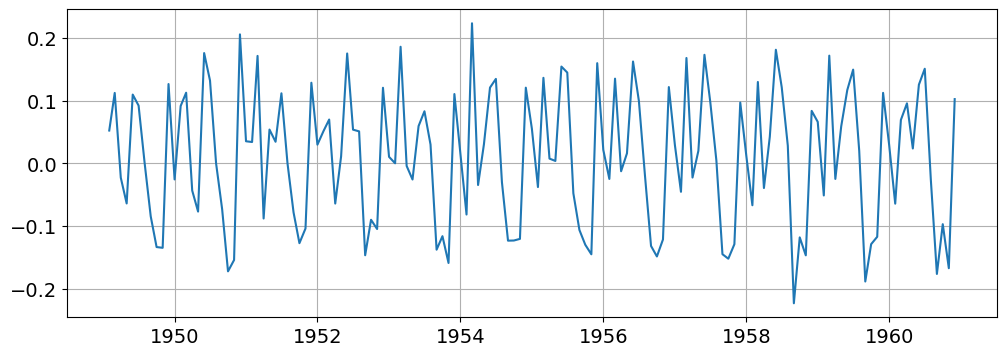

In [29]:
from statsmodels.tsa.arima.model import ARIMA

#AR MODEL
print("Plotting AR model")
model = ARIMA(datasetLogDiffShifting, order=(2, 1, 0))
results_AR = model.fit()
plt.plot(results_AR. fittedvalues, color="red")
title = ((results_AR.fittedvalues - datasetLogDiffShifting ["#Passengers"])**2).sum()
plt.title(f"RSS: {title:.44}")
plt.show()

plt.plot(datasetLogDiffShifting)

## MA Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


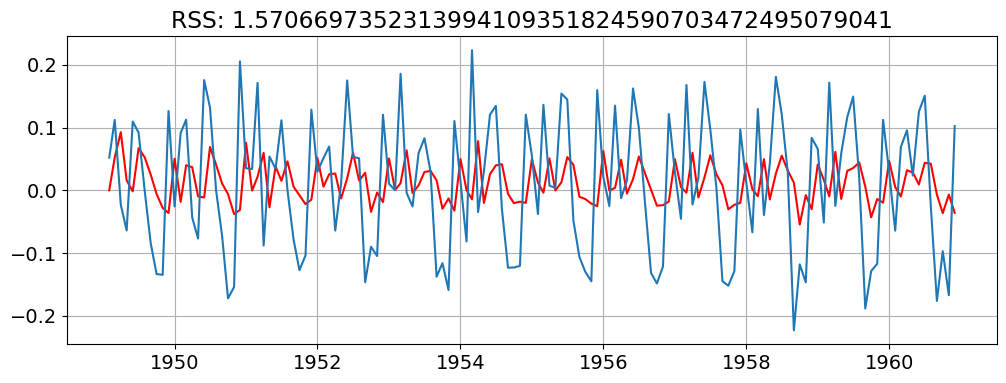

In [31]:
#MA MODEL
model = ARIMA (datasetLogDiffShifting, order=(0, 1, 2))
results_MA = model.fit()
plt.plot(results_MA.fittedvalues, color="red")
plt.plot(datasetLogDiffShifting)
title = ((results_MA.fittedvalues - datasetLogDiffShifting["#Passengers"])**2).sum()
plt.title(f"RSS: {title:.44}")
plt.show()

## ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0.5, 1.0, 'RSS: 0.7748')

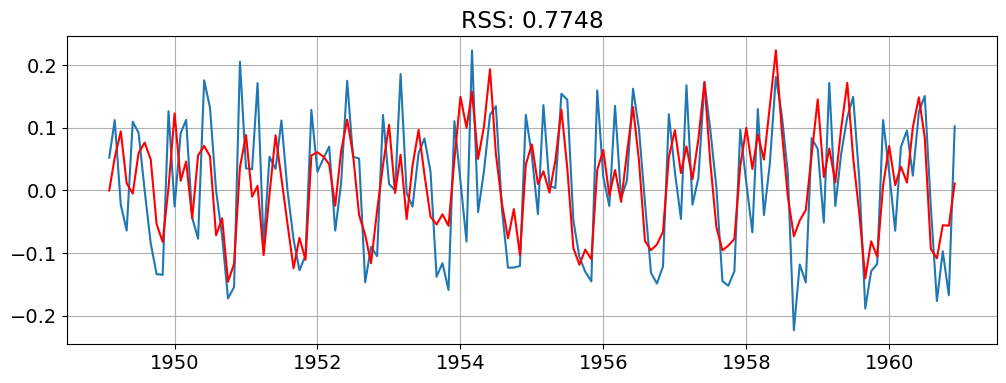

In [33]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA (datasetLogDiffShifting, order=(8, 1, 2))
results_ARIMA = model.fit()
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA. fittedvalues, color='red')
plt.title('RSS: %.4f'% ((results_ARIMA. fittedvalues-datasetLogDiffShifting["#Passengers"])**2).sum())

### Getting Predictions

In [34]:
predictions_ARIMA_diff = pd.Series (results_ARIMA. fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.094140
1949-05-01    0.011477
1949-06-01   -0.005274
dtype: float64


Remember the predictions are in Log_differenceed values.We need to convert them to original form

In [35]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.146326
1949-05-01    0.157803
1949-06-01    0.152529
dtype: float64


In [36]:
predictions_ARIMA_log = pd.Series(indexedDataset_logscale["#Passengers"].iloc[0], index=indexedDataset_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.864825
1949-05-01    4.876302
dtype: float64

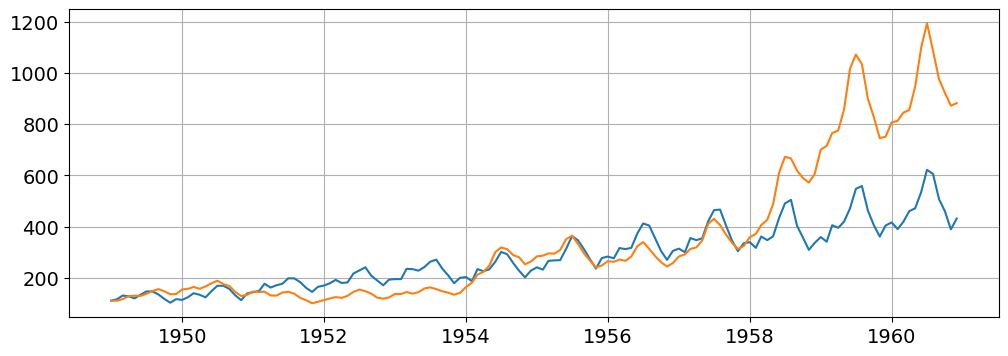

In [37]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.show()

In [38]:
results_ARIMA.forecast(steps = 120)

1961-01-01    0.097712
1961-02-01   -0.000622
1961-03-01    0.025063
1961-04-01    0.013305
1961-05-01    0.096655
                ...   
1970-08-01    0.013044
1970-09-01    0.006144
1970-10-01    0.000351
1970-11-01   -0.002496
1970-12-01   -0.001703
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

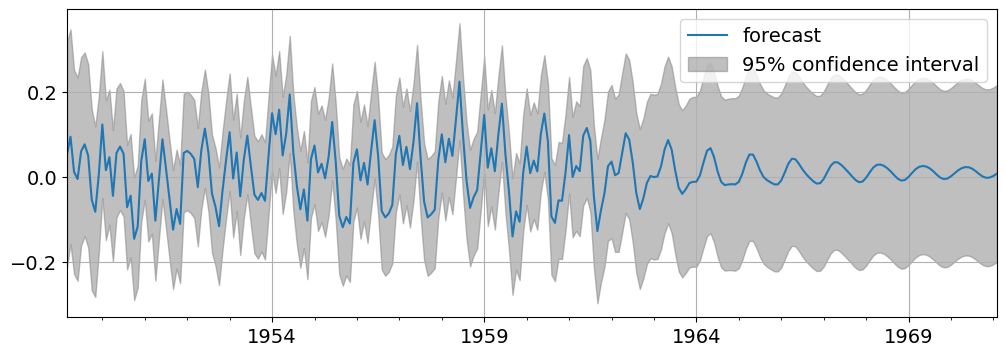

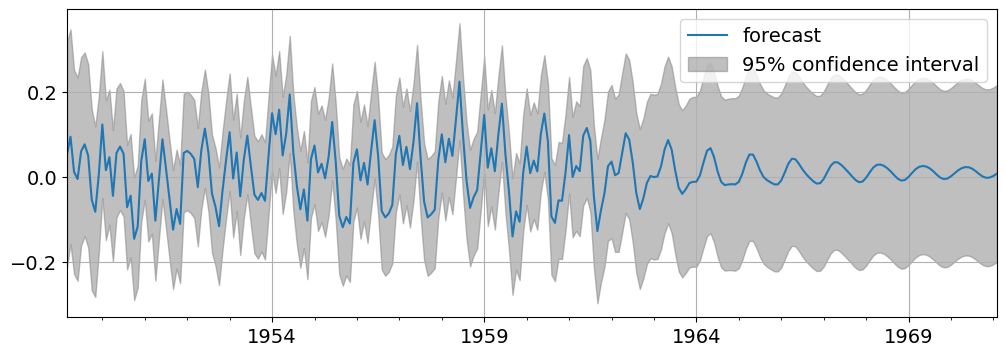

In [40]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(results_ARIMA,1,264)

## How to get better results
- Use Seasonal models
- Use Other Features
- Combining the above two tasks using SARIMAX model